People used to ask me "how can you be so sure that your new form design really leads to higher conversion rate?". My answer was always "I wasn't 100 percent sure about that, I'm just quite sure that this is not the kind of conversion rate I will get with the old design". What I'm saying was, I rejected the null.

They also asked, "How big is the samples size for me to be certain of my results"?

In short, the answer is "Statistics" and "Power Analysis". Bigger sample size will give you better certainty about your result. However bigger sample size also costs you more money OR take longer time to collect. In the past, I was more concerned with the second issue since my website has only 50-120 visitors every day in the beginning. The more days I use to collect the samples, the more external factors I might need to consider as they may have higher chance to occur during a long period. For example, some returning visitors might have already made up their mind to sign up/purchase after repeatedly visiting the site, so the conversion was less attributable to the design variants.

In [2]:
import numpy as np
import scipy.stats as scs
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
plt.style.use('ggplot')

# Power Analysis - An intuitive story of struggle and power

- It's commonly used for A/B testing
- Use cases: app design variant, sign up form variant, email copy variant to test open rate

Let's say our company which has been in business for 10 years has very well established that an app feature has 10% or 0.1 conversion rate. We are going to roll out an update to a small batch of users. We have targeted an increase of 5% conversion rate. If we achieved that, then we will update the feature for all users. Hence

In [3]:
BCR = 0.1
MDE = 0.05
DR = BCR + MDE

The issue here is that we will never know what is the true conversion rate. Will we get the 5% increase we want? Even if 15% is true, you might end up with 11% or 17% at the end of the roll-out test. Welcome to the world of uncertainty. If 15% conversion rate is really true at all, the more tests being conducted, the closer to 15% you wil get. However, we only can perform one or few tests. 

Let's say we set up an A/B testing experiment. Here's how the probability distribution of 0.1 and the potential 0.15 conversion rates with sample size of 150 visitors each (total sample size for the experiment = 300) looks like:

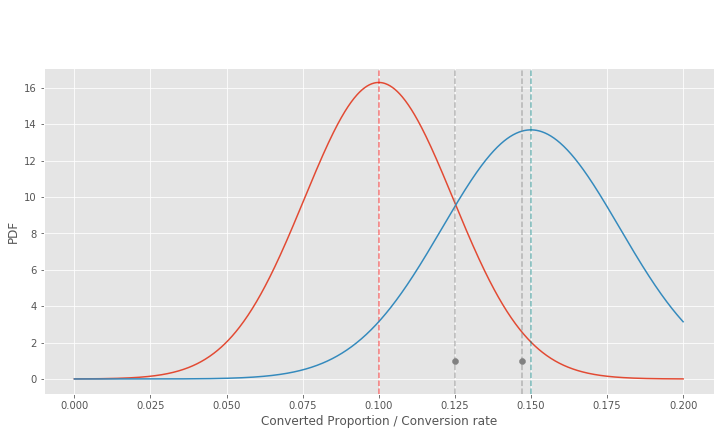

In [50]:
# standard error of the mean for both groups
SE_A = np.sqrt(BCR * (1-BCR)) / np.sqrt(150)
SE_B = np.sqrt(DR * (1-DR)) / np.sqrt(150)

fig, ax = plt.subplots(figsize=(12,6))

x = np.linspace(0,.2,1000)
y = scs.norm(BCR, SE_A).pdf(x) #normal distribution and using standard error of the mean as standard deviation
ax.plot(x,y)
ax.axvline(BCR, c='red', alpha=.5, linestyle='--')

y = scs.norm(DR, SE_B).pdf(x)
ax.plot(x,y)
ax.axvline(DR, c='teal', alpha=.5, linestyle='--')

ax.scatter(0.125,1, c='gray')
ax.axvline(0.125, c='gray', alpha=.5, linestyle='--')
ax.annotate('0.125', (0.125,20), color='gray')

ax.scatter(0.147,1, c='gray')
ax.axvline(0.147, c='gray', alpha=.5, linestyle='--')
ax.annotate('0.147', (0.147,20), color='gray')

ax.set_xlabel('Converted Proportion / Conversion rate')
ax.set_ylabel('PDF');

**Assuming 0.15 is really true at all, at the end of the roll-out test, it's really possible to observe 0.125 (with lower probability) or 0.147 (with higher probability), from the perspective of p.d.f. of 0.15.**

**But at the same time, they are also really possible from the perspective of p.d.f. of 0.1.**

**Let's look at 0.125. Here's an interesting contradiction. According to a one-sample z-test for 0.10 p.d.f with 5% significance level, we can't reject that 0.125 is not from its population, or in other words, it's likely that there's no significant change in the conversion rate. However from the other guy's perspective (0.15 p.d.f.), we can't reject that 0.125 is not from its population as well, if 0.15 is really true at all!**

## So much uncertainty!

**What should we do now? Let's increase our sample size to 300 each, then to 600 and lastly to an extreme case of 10000 each (total sample size for the experiment = 20000).**

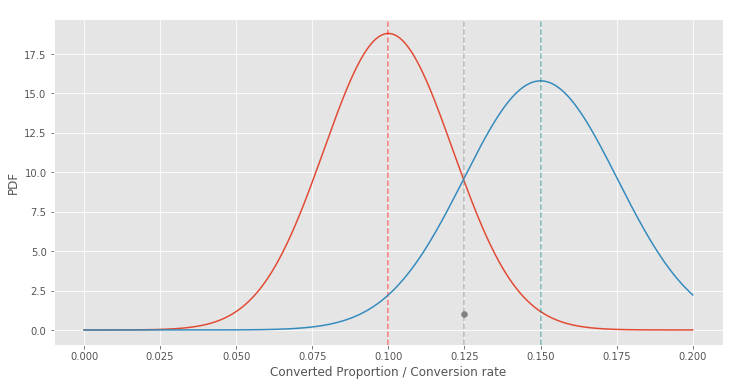

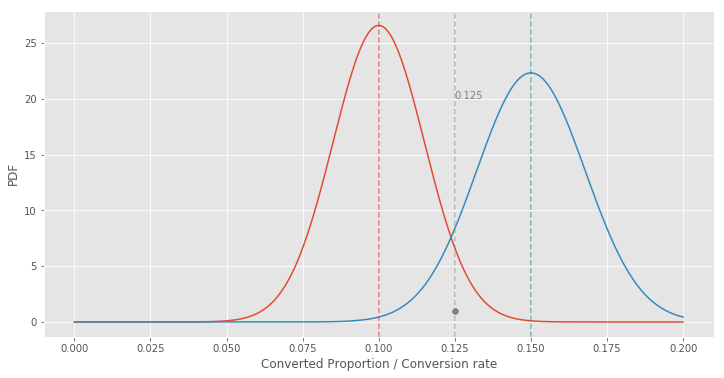

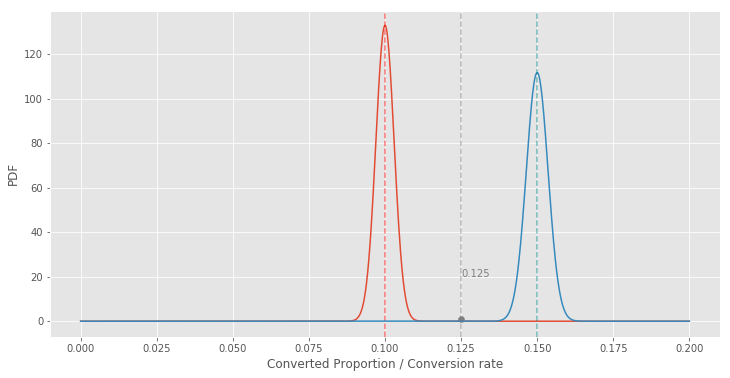

In [53]:
def generate_chart01(sample_size):
    SE_A = np.sqrt(BCR * (1-BCR)) / np.sqrt(sample_size)
    SE_B = np.sqrt(DR * (1-DR)) / np.sqrt(sample_size)

    fig, ax = plt.subplots(figsize=(12,6))

    x = np.linspace(0,.2,1000)
    y = scs.norm(BCR, SE_A).pdf(x)
    ax.plot(x,y)
    ax.axvline(BCR, c='red', alpha=.5, linestyle='--')

    y = scs.norm(DR, SE_B).pdf(x)
    ax.plot(x,y)
    ax.axvline(DR, c='teal', alpha=.5, linestyle='--')

    ax.scatter(0.125,1, c='gray')
    ax.axvline(0.125, c='gray', alpha=.5, linestyle='--')
    ax.annotate('0.125', (0.125,20), color='gray')

    ax.set_xlabel('Converted Proportion / Conversion rate')
    ax.set_ylabel('PDF');
    
generate_chart01(200)
generate_chart01(400)
generate_chart01(10000)

Well, what do these mean? As it turns out, when your sample size is too low, your chance of observing a value near 0.15 is low, and value like 0.125 does not give you much certainty in which population it belongs to, as compared to sample size of 400. Your test is said to be **underpowered**. When the sample size is too large, value like 0.125 becomes extremely unlikely compared to value like 0.149, and so you can be highly certain that:
1. it belongs to the 0.15 p.d.f. (again, if 0.15 is the true rate)
2. it is signicantly different from the BCR

When everything else is equal (BCR, MDE), higher sample size gives you more power. In our case, we don't need a sample size of 10000 or even 1,000,000 to prove the true conversion rate to us. This sample size **overpowered** out test. 400 may have been all we need to give us much of the assurance we need.

Continue from there, we have a target of 5% increase (MDE). With enough sample size, we would have gotten a significantly different conversion rate even with 0.125 but that's not what we want! 4.2%, 4.5% or 4.7% are effects that are more likely to be a potential difference that are generated by the 0.15 p.d.f. In other words, we want power just high enough to detect the difference. With smaller sample size hence smaller power, we might let the difference go undetected.

# Power = 0.8

The commonly used "power" is 0.8. Visually, it's the area under curve of the desired p.d.f. that starts at the alpha value of the BCR p.d.f. Hence, when everything else being equal (BCR, MDE, sample size), the smaller the alpha value (indicated by your desired significance level), the lower the power. That means, more power is needed for higher accuracy, as indicated by the desire of smaller alpha.  

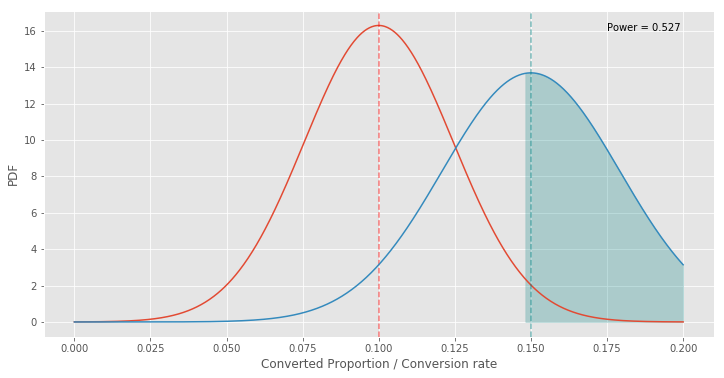

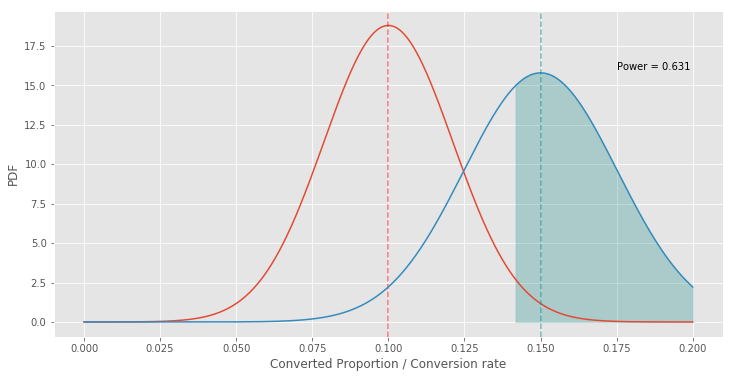

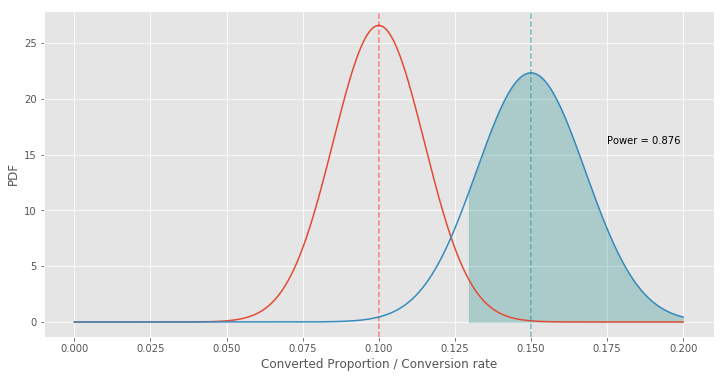

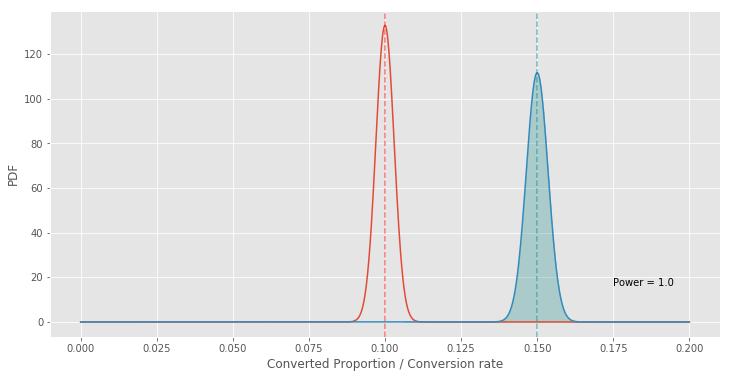

In [55]:
def generate_chart02(sample_size):
    SE_A = np.sqrt(BCR * (1-BCR)) / np.sqrt(sample_size)
    SE_B = np.sqrt(DR * (1-DR)) / np.sqrt(sample_size)
    
    v_A = BCR + 1.96*SE_A
    z_B = (v_A - DR) / SE_B 
    power = round((stats.norm.sf(z_B)),3)

    fig, ax = plt.subplots(figsize=(12,6))

    x = np.linspace(0,.2,1000)
    y = scs.norm(BCR, SE_A).pdf(x)
    ax.plot(x,y)
    ax.axvline(BCR, c='red', alpha=.5, linestyle='--')

    y = scs.norm(DR, SE_B).pdf(x)
    ax.plot(x,y)
    ax.axvline(DR, c='teal', alpha=.5, linestyle='--')
    ax.fill_between(x,y, color='teal', alpha='0.25', where=(x > BCR + 1.96*SE_A))
    ax.annotate('Power = '+str(power), (0.175,16))

    ax.set_xlabel('Converted Proportion / Conversion rate')
    ax.set_ylabel('PDF');
    
generate_chart02(150)
generate_chart02(200)
generate_chart02(400)
generate_chart02(10000)

Enough said! So how much visitors do I need to give my test a power of 0.8, so that it is *more likely to prevent any potential effect to go undetected*, or *have a higher chance to detect >=5% increase, if 15% conversion is really possible in the first place*?

In [56]:
# Minimum total sample size for an equal split A/B testing

def min_total_sample_size(BCR, MDE, power=0.8, alpha=0.05):

    standard_norm = scs.norm(0, 1) # initiate a standard normal distribution
    
    Z_beta = standard_norm.ppf(power)
    Z_alpha = standard_norm.ppf(1-alpha/2)
    pooled_prob = (BCR + BCR + MDE) / 2

    minimum_total_sample = (2 * pooled_prob * (1 - pooled_prob) * (Z_beta + Z_alpha)**2 / MDE**2)

    return minimum_total_sample

In [64]:
print('Total sample size of {:.0f} is all we ever need'.format( min_total_sample_size(BCR=0.10, MDE=0.05) ) )

Total sample size of 687 is all we ever need


# Run the A/B testing

In [188]:
incoming_visitors = 687
p_A = 0.1
p_B = 0.15

grouped_visitors = np.random.randint(0,2,incoming_visitors)
print('First 15 visitors:', grouped_visitors[:15])
print('0 means group A, 1 means group B')

B_visitors = grouped_visitors.sum()
A_visitors = incoming_visitors - B_visitors

A_converted = np.random.binomial(A_visitors, p_A)
B_converted = np.random.binomial(B_visitors, p_B)

AB_test = pd.DataFrame({'Total':[A_visitors, B_visitors],
              'Converted':[A_converted,B_converted]})
AB_test.index = ['A','B']
AB_test['Rate'] = AB_test.Converted / AB_test.Total
AB_test

First 15 visitors: [0 1 1 1 1 1 0 0 1 0 0 1 1 0 0]
0 means group A, 1 means group B


,Total,Converted,Rate
A,355,39,0.109859
B,332,53,0.159639


In [189]:
rate_A = AB_test['Rate']['A']
rate_B = AB_test['Rate']['B']

In [ ]:
# to be continued... for running hypothesis testing after A/B test

In [ ]:
# to be continued... for beta, alpha, type 1 and 2 error